# Please Play with SideBard Chatbot!

1. Ask any question that is in the google's help documents for google sheets, google docs, or Bard and get the answer! 

2. SideBard will say "I don't know" if it doesn't know the answer from the documents we have compiled, but may give a reasonable guess based on what it searched. 

3. Why did SideBard answer the way it did? Add `print_message=True` to the `ask` function to see the text it searched.

4. Curious for more? Look at the top 10 results from the search by adding `print_search=True` to the `ask` function.

In [1]:
import nbimporter
from function_source import *
from api_doc import *


# API configuration
openai.api_key = OPEN_AI_KEY

# for LangChain
os.environ["OPENAI_API_KEY"] = OPEN_AI_KEY


In [2]:
your_question = input("What is your question? ")

display_answer_in_markdown(your_question, 'User Question')


TypeError: ask() missing 1 required positional argument: 'df'

In [ ]:
ask(your_question, print_message=True)

I'm 40 to 49 years old. I have basic knowledge about AI. Use the below articles on Google's help and user experience documentation to answer the subsequent question. If the answer cannot be found in the articles, answer to the best of your abilities but convey that you were unable to find the information with the Google Help dataset you were provided. Please say hello to Samir before offering your answer"
\Google Help article section:
"""
Title: Google Bard , Description: Skip to main content
Bard
Use Bard
You can use Bard to help move your ideas forward. With a little help from Bard, you can do things like:

Brainstorm ideas, develop a plan, or find different ways to get things done
Get a quick, easy to understand summary of more complex topics
Create first drafts of outlines, emails, blog posts, poems, and much more
What you need
A personal Google Account that you manage on your own, or a Google Workspace account for which your administrator has enabled access to Bard. You still can’

"Hello Samir! I apologize, but I couldn't find any specific information in the provided Google Help articles about how Bard handles angry users. It's possible that the information may be available in other resources or documentation. Is there anything else I can assist you with?"

In [ ]:
# Set up the data
answers = pd.DataFrame(strings_ranked_by_relatedness(your_question, df, top_n=15))
answers = answers.T.rename(columns={0: 'Answer', 1: 'Relatedness'}).sort_values("Relatedness", ascending=False).reset_index(drop=True)
answers.head()


,Answer,Relatedness
0,"Title: Google Bard , Description: Skip to main...",0.813033
1,"Title: Google Bard , Description: Skip to main...",0.809134
2,"Title: Google Bard , Description: Skip to main...",0.805685
3,"Title: Google Bard , Description: Skip to main...",0.805467
4,"Title: Google Sheets, Description: Skip to mai...",0.709589


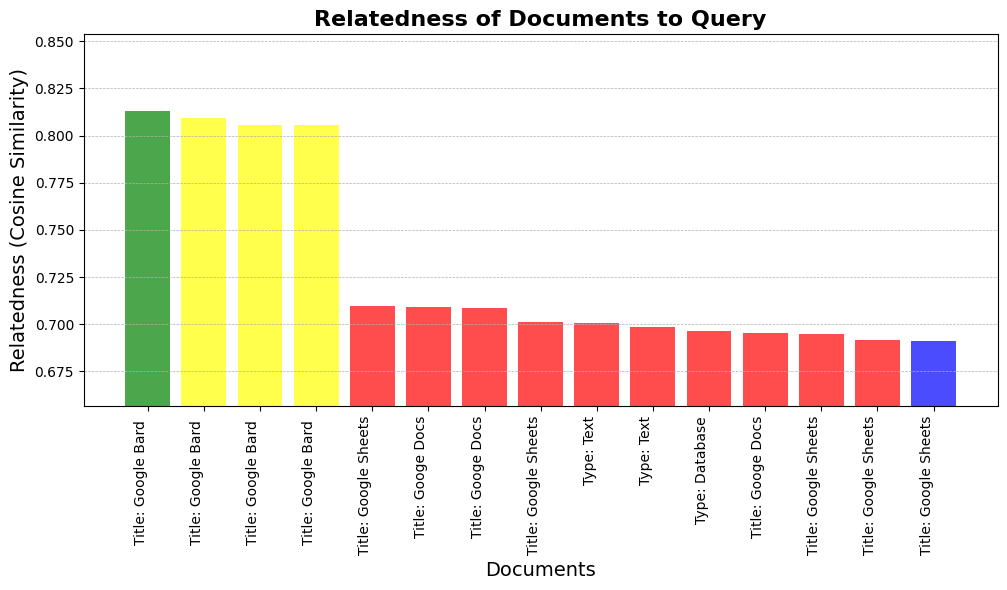

In [ ]:

plt.figure(figsize=(10, 6))

# Create the bar plot
plt.bar(answers.index, answers.Relatedness, color=segment_colors, alpha=0.7)

# Beautify the plot
plt.title("Relatedness of Documents to Query", fontsize=16, fontweight='bold')
plt.xlabel("Documents", fontsize=14)
plt.ylabel("Relatedness (Cosine Similarity)", fontsize=14)
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)
plt.xticks(ticks=answers.index, labels=answers['Answer'].str.split(',').str[0], rotation=90, ha='right')  # Set x-axis labels as the answers
plt.tight_layout()
plt.ylim(answers.Relatedness.min()*.95, answers.Relatedness.max()*1.05)

# Display the plot
plt.show()
